In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("../input/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.shape

(599, 9)

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
Pregnancies                 599 non-null int64
Glucose                     599 non-null int64
BloodPressure               599 non-null int64
SkinThickness               599 non-null int64
Insulin                     599 non-null int64
BMI                         599 non-null float64
DiabetesPedigreeFunction    599 non-null float64
Age                         599 non-null int64
Outcome                     599 non-null int64
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.207115
Glucose,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.449719
BloodPressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,0.061086
SkinThickness,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,0.075585
Insulin,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.145892
BMI,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.315894
DiabetesPedigreeFunction,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.181561
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.210234
Outcome,0.207115,0.449719,0.061086,0.075585,0.145892,0.315894,0.181561,0.210234,1.000000


In [41]:
X = df.iloc[:,0:8] 
y = df.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(8,'Score'))

                   Features        Score
4                   Insulin  2176.855078
1                   Glucose  1075.163239
5                       BMI   119.892711
7                       Age   111.081961
0               Pregnancies    75.846894
3             SkinThickness    42.627725
2             BloodPressure    12.137947
6  DiabetesPedigreeFunction     4.667840


[0.08069198 0.23539942 0.09083894 0.05723041 0.08313497 0.21257328
 0.10953653 0.13059448]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


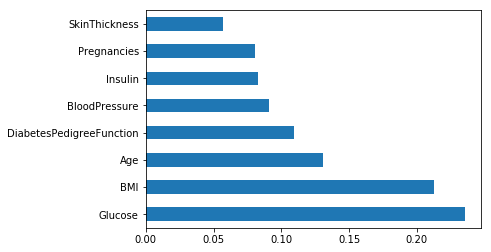

In [42]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

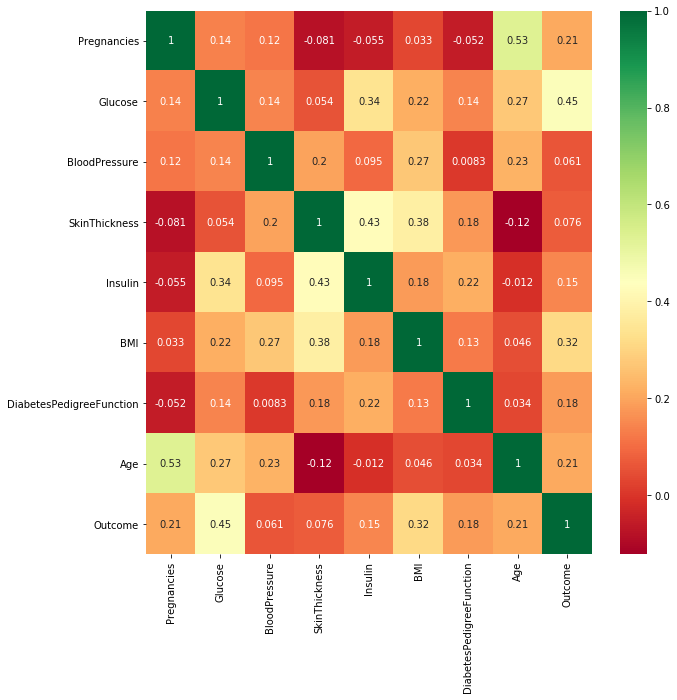

In [43]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")